In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 

from statistics import mean

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [77]:
#Load Data
feature = pd.read_csv("features.csv")
store = pd.read_csv("stores.csv")
sales = pd.read_csv("train.csv")

In [78]:
#Check for Null Data
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [79]:
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [80]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [81]:
feature['CPI'].fillna(np.nanmean(feature['CPI']),inplace=True)
feature['Unemployment'].fillna(np.nanmean(feature['Unemployment']),inplace=True)
feature['MarkDown1'].fillna(0,inplace=True)
feature['MarkDown2'].fillna(0,inplace=True)
feature['MarkDown3'].fillna(0,inplace=True)
feature['MarkDown4'].fillna(0,inplace=True)
feature['MarkDown5'].fillna(0,inplace=True)

In [82]:
#Check for Null Data
feature.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [83]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [84]:
#checking
np.nanmean(feature['CPI'])

172.46080918276132

In [85]:
data=pd.merge(store,sales)

In [86]:
data.head(5)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,2010-02-05,24924.50,False
1,1,A,151315,1,2010-02-12,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-03-05,21827.90,False


In [87]:
len(data)

421570

In [88]:
set1=pd.merge(feature,data,on=['Store','Date','IsHoliday'],how='inner')

In [89]:
set1.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38
5,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,6,5749.03
6,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,7,21084.08
7,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,8,40129.01
8,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,9,16930.99
9,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,10,30721.50


In [90]:
len(set1)

421570

In [91]:
set1.to_csv (r'set1.csv', index = False, header=True)

In [92]:
set1.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Dept            0
Weekly_Sales    0
dtype: int64

In [93]:
data_set=set1.sort_values(by=['Date'])

In [55]:
data_set.head(20)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,3,14612.19
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,4,26323.15
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,5,36414.63
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,6,11437.81
330765,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,7,23416.24
330766,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,8,27545.38
330767,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,9,12454.61
330768,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,10,15052.46
330760,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,2,57523.15


In [94]:
data_set.corr()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales
Store,1.000000,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.000548,-0.182881,0.024004,-0.085195
Temperature,-0.050097,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.155949,-0.058313,0.004437,-0.002312
Fuel_Price,0.065290,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,-0.078281,0.003361,0.003572,-0.000120
MarkDown1,-0.059844,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,-0.003521,0.169788,0.001494,0.047172
MarkDown2,-0.033829,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.207604,0.078372,0.000587,0.020716
MarkDown3,-0.020331,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.266471,0.033641,0.001475,0.038562
MarkDown4,-0.042724,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,0.011565,0.127334,0.001937,0.037467
MarkDown5,-0.012452,-0.014752,0.215420,0.415050,0.131735,0.042471,0.303370,1.000000,0.067906,-0.120406,-0.015235,0.153011,0.002668,0.050465
CPI,-0.211088,0.182112,-0.164210,0.010915,-0.003554,-0.005839,-0.002047,0.067906,1.000000,-0.299953,-0.001944,-0.003314,-0.007477,-0.020921
Unemployment,0.208552,0.096730,-0.033853,-0.105168,-0.041427,-0.018078,-0.076513,-0.120406,-0.299953,1.000000,0.010460,-0.068238,0.007837,-0.025864


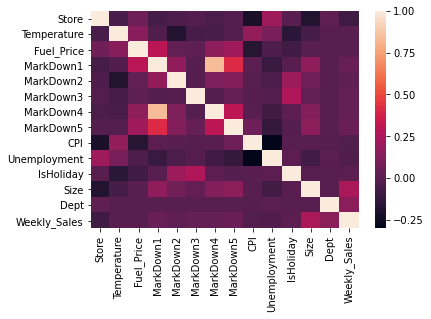

In [95]:
sns.heatmap(data_set.corr())

In [96]:
df = pd.DataFrame(data_set)
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [97]:
arr=df['Weekly_Sales'].to_numpy()
a=np.unique(arr)

In [98]:
a.shape

(359464,)

In [99]:
data_set.drop(['MarkDown1','MarkDown2','MarkDown4','MarkDown5'], 1, inplace=True)

In [100]:
data_set.head()

,Store,Date,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,211.096358,8.106,False,A,151315,1,24924.50
330761,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,B,103681,3,14612.19
330762,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,B,103681,4,26323.15
330763,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,B,103681,5,36414.63
330764,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,B,103681,6,11437.81


In [101]:
data_set.corr()

,Store,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales
Store,1.000000,-0.050097,0.065290,-0.020331,-0.211088,0.208552,-0.000548,-0.182881,0.024004,-0.085195
Temperature,-0.050097,1.000000,0.143859,-0.056026,0.182112,0.096730,-0.155949,-0.058313,0.004437,-0.002312
Fuel_Price,0.065290,0.143859,1.000000,0.018615,-0.164210,-0.033853,-0.078281,0.003361,0.003572,-0.000120
MarkDown3,-0.020331,-0.056026,0.018615,1.000000,-0.005839,-0.018078,0.266471,0.033641,0.001475,0.038562
CPI,-0.211088,0.182112,-0.164210,-0.005839,1.000000,-0.299953,-0.001944,-0.003314,-0.007477,-0.020921
Unemployment,0.208552,0.096730,-0.033853,-0.018078,-0.299953,1.000000,0.010460,-0.068238,0.007837,-0.025864
IsHoliday,-0.000548,-0.155949,-0.078281,0.266471,-0.001944,0.010460,1.000000,0.000593,0.000916,0.012774
Size,-0.182881,-0.058313,0.003361,0.033641,-0.003314,-0.068238,0.000593,1.000000,-0.002966,0.243828
Dept,0.024004,0.004437,0.003572,0.001475,-0.007477,0.007837,0.000916,-0.002966,1.000000,0.148032
Weekly_Sales,-0.085195,-0.002312,-0.000120,0.038562,-0.020921,-0.025864,0.012774,0.243828,0.148032,1.000000


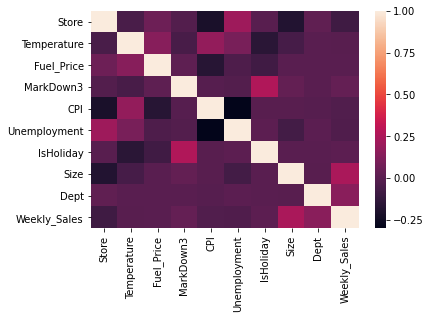

In [102]:
sns.heatmap(data_set.corr())

In [103]:
test = pd.read_csv("test.csv")

In [104]:
# Add column for year
data_set['Year'] = pd.to_datetime(data_set['Date'], format="%Y-%m-%d").dt.year
test["Year"] = pd.to_datetime(test["Date"], format="%Y-%m-%d").dt.year
# Add column for day
data_set["Day"] = pd.to_datetime(data_set["Date"], format="%Y-%m-%d").dt.day
test["Day"] = pd.to_datetime(test["Date"], format="%Y-%m-%d").dt.day
# Add column for days to next Christmas
data_set["Days to Next Christmas"] = (pd.to_datetime(data_set["Year"].astype(str)+"-12-31", format="%Y-%m-%d") - pd.to_datetime(data_set["Date"], format="%Y-%m-%d")).dt.days.astype(int)
test["Days to Next Christmas"] = (pd.to_datetime(test["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                  pd.to_datetime(test["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [106]:
data_set.head()
test.head()

,Store,Dept,Date,IsHoliday,Year,Day,Days to Next Christmas
0,1,1,2012-11-02,False,2012,2,59
1,1,1,2012-11-09,False,2012,9,52
2,1,1,2012-11-16,False,2012,16,45
3,1,1,2012-11-23,True,2012,23,38
4,1,1,2012-11-30,False,2012,30,31


In [107]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
data_set['IsHoliday']= le.fit_transform(data_set['IsHoliday']) 
data_set['Type']= le.fit_transform(data_set['Type']) 


In [108]:
tp = pd.get_dummies(data_set.Type)
data_set = pd.concat([data_set, tp], axis=1)
data_set.head()

,Store,Date,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Year,Day,Days to Next Christmas,0,1,2
0,1,2010-02-05,42.31,2.572,0.0,211.096358,8.106,0,0,151315,1,24924.50,2010,5,329,1,0,0
330761,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,0,1,103681,3,14612.19,2010,5,329,0,1,0
330762,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,0,1,103681,4,26323.15,2010,5,329,0,1,0
330763,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,0,1,103681,5,36414.63,2010,5,329,0,1,0
330764,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,0,1,103681,6,11437.81,2010,5,329,0,1,0


In [109]:
data_set = data_set.drop(columns='Type')
#data_set.drop(['A','B','C'], 1, inplace=True)

In [110]:
data_set.drop(['Date'], 1, inplace=True)
#data_set.drop(['Weekly_Sales'],1,inplace=True)
test.drop(['Date'], 1, inplace=True)

In [111]:
data_set.head()

,Store,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Year,Day,Days to Next Christmas,0,1,2
0,1,42.31,2.572,0.0,211.096358,8.106,0,151315,1,24924.50,2010,5,329,1,0,0
330761,35,27.19,2.784,0.0,135.352461,9.262,0,103681,3,14612.19,2010,5,329,0,1,0
330762,35,27.19,2.784,0.0,135.352461,9.262,0,103681,4,26323.15,2010,5,329,0,1,0
330763,35,27.19,2.784,0.0,135.352461,9.262,0,103681,5,36414.63,2010,5,329,0,1,0
330764,35,27.19,2.784,0.0,135.352461,9.262,0,103681,6,11437.81,2010,5,329,0,1,0


In [112]:
train_WM, test_WM = train_test_split(data_set, test_size=0.2,random_state=0)

In [114]:
X_Train = train_WM[['Store','Temperature', 'Fuel_Price', 'MarkDown3','CPI', 'Unemployment', 'IsHoliday','Size','Dept',0,1,2,'Year','Day','Days to Next Christmas']]
Y_Train = train_WM['Weekly_Sales']

In [115]:
X_Test = test_WM[['Store','Temperature', 'Fuel_Price', 'MarkDown3','CPI', 'Unemployment', 'IsHoliday','Size','Dept',0,1,2,'Year','Day','Days to Next Christmas']]
Y_Test = test_WM['Weekly_Sales']

In [116]:
X_Train.head()

,Store,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Size,Dept,0,1,2,Year,Day,Days to Next Christmas
357143,38,76.67,4.087,0.0,129.062355,13.736,0,39690,13,0,0,1,2011,27,218
300054,31,65.16,3.353,0.0,217.165004,7.441,0,203750,35,1,0,0,2011,21,71
415289,45,30.55,3.229,0.0,182.919337,8.549,0,118221,3,0,1,0,2011,21,344
297810,31,54.69,3.459,0.0,213.764640,8.028,0,203750,82,1,0,0,2011,11,295
74735,8,72.20,3.355,0.0,220.132918,6.425,0,155078,27,1,0,0,2011,30,92


In [117]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_Train,Y_Train)
y_pred = dt.predict(X_Test)

In [118]:
print(mean_absolute_error(Y_Test,y_pred))

1726.903616125436


In [119]:
print(mean_absolute_error(Y_Test,y_pred))

1726.903616125436


In [120]:
print(mean_squared_error(Y_Test,y_pred))

19557668.35905279


In [121]:
accuracy=dt.score(X_Test,Y_Test)

In [122]:
print(accuracy)

0.9623958338708186


In [123]:
x_train= data_set[['Store', 'IsHoliday','Dept','Year','Day','Days to Next Christmas']]
y_train = data_set['Weekly_Sales']

In [124]:
x_test=test[['Store', 'IsHoliday','Dept','Year','Day','Days to Next Christmas']]

In [125]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(y_pred)

[27390.81 18689.54 19050.66 ...   695.21   845.3    657.63]


In [126]:
test.head()

,Store,Dept,IsHoliday,Year,Day,Days to Next Christmas
0,1,1,False,2012,2,59
1,1,1,False,2012,9,52
2,1,1,False,2012,16,45
3,1,1,True,2012,23,38
4,1,1,False,2012,30,31


In [127]:
test1 = pd.read_csv("test.csv")

In [128]:
test1.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [131]:
df2 = pd.DataFrame({"Store_Dept_Date": test1.Store.astype(str)+'_'+test1.Dept.astype(str)+'_'+test1.Date.astype(str),
        "Weekly_Sales": y_pred})

In [132]:
df2.to_csv (r'swarnim_predictions.csv', index = False, header=True)